# Big Mart Sales Prediction
**By Group 3 Members:**
- Amal V Nair
- Rashmi Ramakrishnan
- Sudheesh V
- Iyrin Sara Varghese
- Alamkheer Husainul Fareedh

## Importing Relevant Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV, ParameterGrid
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, PowerTransformer

In [ ]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

## Reading Data into Python

### Test Data

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Ml_course/Competetion/test_AbJTz2l.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


### Sample Data

In [ ]:
sample_ = pd.read_csv('/content/drive/MyDrive/Ml_course/Competetion/sample_submission_8RXa3c6.csv')
sample_.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


### Train Data

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Ml_course/Competetion/train_v9rqX0R.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df = train.copy(deep=True)
df.shape

(8523, 12)

## Analysing Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.describe(exclude=np.number)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [ ]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

The column contain redundant categories that can be merged with Low Fat and Regular categories

In [ ]:
df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'}, inplace=True)

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Handling Null values

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The weight and size columns contain null values.

In [ ]:
df.loc[df['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


Since there are multiple types of items, the missing values can be imputed with the median of the type to which the particular product belongs.

In [ ]:
df.groupby('Item_Type')['Item_Weight'].median()

Item_Type
Baking Goods             11.650
Breads                   10.600
Breakfast                10.695
Canned                   12.150
Dairy                    13.350
Frozen Foods             12.850
Fruits and Vegetables    13.100
Hard Drinks              10.100
Health and Hygiene       12.150
Household                13.150
Meat                     12.350
Others                   14.500
Seafood                  11.650
Snack Foods              13.150
Soft Drinks              11.800
Starchy Foods            13.175
Name: Item_Weight, dtype: float64

In [ ]:
df['Item_Weight'] = df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform('median'))

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df.loc[(df['Outlet_Size'].isnull()) & (df['Outlet_Type']=='Supermarket Type1')].shape

(1855, 12)

In [ ]:
df.loc[(df['Outlet_Size'].isnull()) & (df['Outlet_Type']== 'Grocery Store')].shape

(555, 12)

In [ ]:
df['Outlet_Size'].isnull().sum() == 555 + 1855

True

In [ ]:
df.groupby('Outlet_Identifier')['Outlet_Size'].agg(pd.Series.mode)

Outlet_Identifier
OUT010        []
OUT013      High
OUT017        []
OUT018    Medium
OUT019     Small
OUT027    Medium
OUT035     Small
OUT045        []
OUT046     Small
OUT049    Medium
Name: Outlet_Size, dtype: object

- Outlets 10, 17, and 45 are completely missing size data.
- Since the missing data outlet types are Supermarket Type 1 and grocery stores, the size of such types of stores can be used to impute the missing values.

In [ ]:
df.groupby('Outlet_Type')['Outlet_Size'].agg(pd.Series.mode)

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [ ]:
f = lambda x: x.mode().iloc[0]
df['Outlet_Size'] = df['Outlet_Size'].fillna(df.groupby('Outlet_Type')['Outlet_Size'].transform(f))

In [ ]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df.groupby('Outlet_Identifier')['Outlet_Size'].agg(pd.Series.mode)

Outlet_Identifier
OUT010     Small
OUT013      High
OUT017     Small
OUT018    Medium
OUT019     Small
OUT027    Medium
OUT035     Small
OUT045     Small
OUT046     Small
OUT049    Medium
Name: Outlet_Size, dtype: object

Item Visibility is the percentage of total area allocated to the particular product. It doesn't make sense that some of the prodcuts have zero visibility.

In [ ]:
df.loc[df['Item_Visibility']==0].shape

(526, 12)

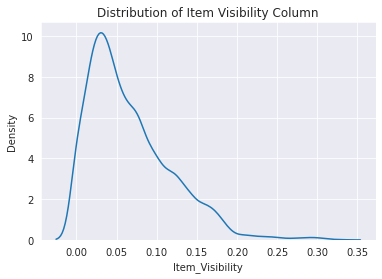

In [ ]:
sns.kdeplot(x=df['Item_Visibility'])
plt.title('Distribution of Item Visibility Column')
plt.show()

We can replace the zero values with median.

In [ ]:
df['Item_Visibility'].replace(0, df['Item_Visibility'].median(), inplace=True)

In [ ]:
df.loc[df['Item_Visibility']==0].shape

(0, 12)

In [ ]:
total_sales = df.groupby(['Outlet_Identifier', 'Outlet_Location_Type'])['Item_Outlet_Sales'].sum().reset_index()

### Analysis of Sales based on Type of City

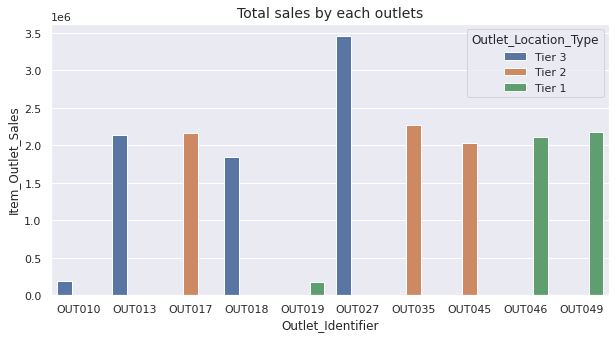

In [ ]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=total_sales, hue='Outlet_Location_Type')
plt.title('Total sales by each outlets', fontsize=14)
plt.show()

Outlests in Tier 3 Cities appear to have more sales

### Total Sales by Item Type

In [ ]:
sales_by_type = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().reset_index()

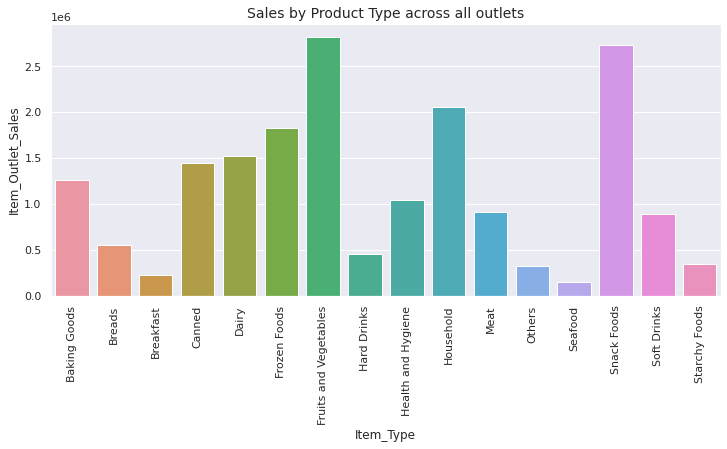

In [ ]:
plt.figure(figsize=(12, 5))
sns.set_style('darkgrid')
plt.title('Sales by Product Type across all outlets', fontsize=14)
plt.xticks(rotation=90)
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=sales_by_type)
plt.show()

We see that fruits and vegetables have highest sales followed by Snack foods.

In [ ]:
sales_store_type = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().reset_index()

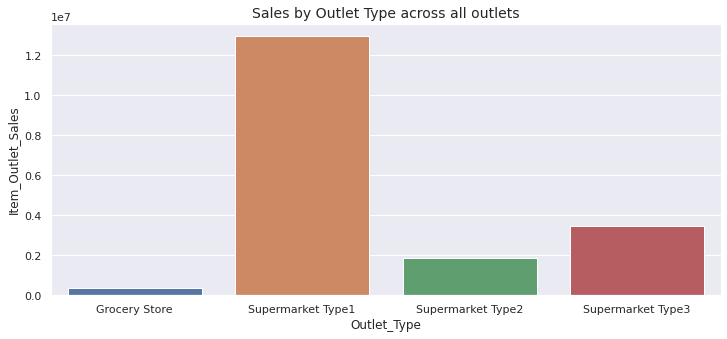

In [ ]:
plt.figure(figsize=(12, 5))
sns.set_style('darkgrid')
plt.title('Sales by Outlet Type across all outlets', fontsize=14)

sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=sales_store_type)
plt.show()

Type 1 supermarkets lead in sales.

### Relationships between:
- Product Weight and MRP

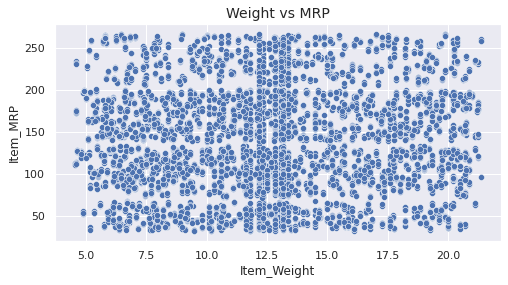

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Item_Weight', y='Item_MRP', data=df)
plt.title('Weight vs MRP', fontsize=14)
plt.show()

- Visibility and Sales

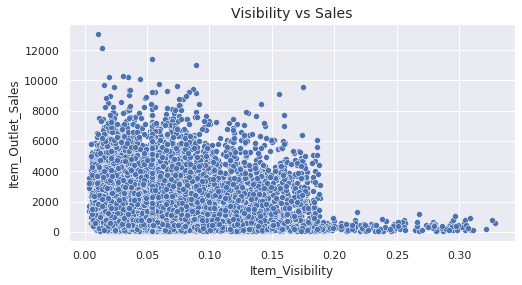

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df)
plt.title('Visibility vs Sales', fontsize=14)
plt.show()

- In both cases, there doesn't seem to be a particular pattern between the variables.
- However, Sales seem low for products with high share of visibility.
- This could be because products with high sales as we saw before are snack foods that doesn't take much space.

### Correlation between Columns

In [ ]:
num_cols = df.select_dtypes(exclude='object').drop('Outlet_Establishment_Year', axis=1).columns.to_list()

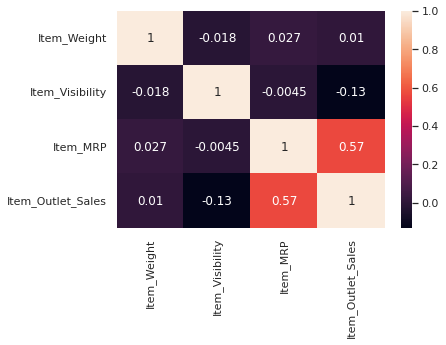

In [ ]:
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Outliers in columns

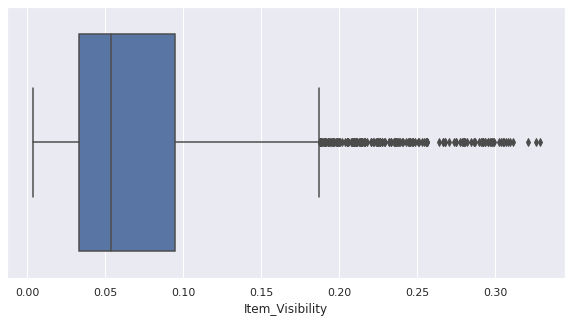

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Item_Visibility', data=df, orient='h')
plt.show()

Since the item visibility varies with type of items, this is to be expected. So we leave it unchanged.

## Feature Engineering

Chainging age into a more meaningful feature such as how old the outlet is.

In [ ]:
df['Outlet_Age'] = 2013 - df['Outlet_Establishment_Year']

Since there are 16 item types, one-hot encoding will lead to too many features. So we can encode using frequency of each type in train set.

In [ ]:
df.groupby('Item_Type').size()/len(df)

Item_Type
Baking Goods             0.076030
Breads                   0.029450
Breakfast                0.012906
Canned                   0.076147
Dairy                    0.080019
Frozen Foods             0.100434
Fruits and Vegetables    0.144550
Hard Drinks              0.025109
Health and Hygiene       0.061011
Household                0.106770
Meat                     0.049865
Others                   0.019829
Seafood                  0.007509
Snack Foods              0.140795
Soft Drinks              0.052212
Starchy Foods            0.017365
dtype: float64

In [ ]:
df['Item_Fat_Content'].loc[df['Item_Type']=='Others'].value_counts()

Low Fat    169
Name: Item_Fat_Content, dtype: int64

In [ ]:
fq = df.groupby('Item_Type').size()/len(df)
df['Item_Type_freq'] = df['Item_Type'].map(fq)
df['Item_Type_freq']

0       0.080019
1       0.052212
2       0.049865
3       0.144550
4       0.106770
          ...   
8518    0.140795
8519    0.076030
8520    0.061011
8521    0.140795
8522    0.052212
Name: Item_Type_freq, Length: 8523, dtype: float64

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_freq
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,0.080019
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,0.052212
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,0.049865
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,0.144550
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,0.106770


**Changing the fat content of non consumable products to non-edible**

In [ ]:
non_edible = ['Household', 'Health and Hygiene']
df.loc[df['Item_Type'].isin(non_edible), 'Item_Fat_Content'] = 'Non Edible'

In [ ]:
df.loc[df['Item_Type'].isin(non_edible), 'Item_Fat_Content']

4       Non Edible
16      Non Edible
22      Non Edible
25      Non Edible
31      Non Edible
           ...    
8499    Non Edible
8500    Non Edible
8502    Non Edible
8504    Non Edible
8520    Non Edible
Name: Item_Fat_Content, Length: 1430, dtype: object

In [ ]:
X = df.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Type', 'Outlet_Establishment_Year', 'Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

## Encoding

Using ordinal encoder to encode Outlet size since it has an order.

In [ ]:
ordinal = OrdinalEncoder()

In [ ]:
X['Outlet_Size'] = ordinal.fit_transform(X[['Outlet_Size']])

In [ ]:
X.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Type_freq
0,9.30,Low Fat,0.016047,249.8092,1.0,Tier 1,Supermarket Type1,14,0.080019
1,5.92,Regular,0.019278,48.2692,1.0,Tier 3,Supermarket Type2,4,0.052212
2,17.50,Low Fat,0.016760,141.6180,1.0,Tier 1,Supermarket Type1,14,0.049865


Dummy Encoding the rest of the columns

In [ ]:
X = pd.get_dummies(columns=['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Type'], data=X, drop_first=True)

In [ ]:
X.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Age,Item_Type_freq,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1.0,14,0.080019,0,0,0,0,1,0,0
1,5.92,0.019278,48.2692,1.0,4,0.052212,0,1,0,1,0,1,0
2,17.50,0.016760,141.6180,1.0,14,0.049865,0,0,0,0,1,0,0


## Scaling

We are only scaling the Item MRP column to see what the result would be.

In [ ]:
scale = StandardScaler()
mrp_scale = scale.fit(X[['Item_MRP']])
X['Item_MRP'] = mrp_scale.transform(X[['Item_MRP']])

In [ ]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Age,Item_Type_freq,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,1.747454,1.0,14,0.080019,0,0,0,0,1,0,0
1,5.92,0.019278,-1.489023,1.0,4,0.052212,0,1,0,1,0,1,0
2,17.50,0.016760,0.010040,1.0,14,0.049865,0,0,0,0,1,0,0
3,19.20,0.053931,0.660050,2.0,15,0.144550,0,1,0,1,0,0,0
4,8.93,0.053931,-1.399220,0.0,26,0.106770,1,0,0,1,1,0,0


## Handling Test Data

Applying similar steps on test data.

In [ ]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [ ]:
test.describe(exclude=np.number)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,5681,5681,5681,4075,5681,5681
unique,1543,5,16,10,3,3,4
top,DRF48,Low Fat,Snack Foods,OUT027,Medium,Tier 3,Supermarket Type1
freq,8,3396,789,624,1862,2233,3717


In [ ]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
test['Item_Weight'] = test['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform('median'))

In [ ]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
f = lambda x: x.mode().iloc[0]
test['Outlet_Size'] = test['Outlet_Size'].fillna(df.groupby('Outlet_Type')['Outlet_Size'].transform(f))

In [ ]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [ ]:
test['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'}, inplace=True)
non_edible = ['Household', 'Health and Hygiene']
test.loc[df['Item_Type'].isin(non_edible), 'Item_Fat_Content'] = 'Non Edible'

In [ ]:
test['Item_Fat_Content'].value_counts()

Low Fat       3098
Regular       1664
Non Edible     919
Name: Item_Fat_Content, dtype: int64

In [ ]:
test['Item_Visibility'].replace(0, df['Item_Visibility'].median(), inplace=True)

In [ ]:
test['Outlet_Age'] = 2013 - test['Outlet_Establishment_Year']

In [ ]:
test['Item_Type_freq'] = test['Item_Type'].map(fq)

In [ ]:
X_test = test.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Type', 'Outlet_Establishment_Year'], axis=1)

In [ ]:
X_test['Outlet_Size'] = ordinal.fit_transform(X_test[['Outlet_Size']])

In [ ]:
X_test['Outlet_Size'].value_counts()

2.0    2855
1.0    2205
0.0     621
Name: Outlet_Size, dtype: int64

In [ ]:
X_test = pd.get_dummies(columns=['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Type'], data=X_test, drop_first=True)
X_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Age,Item_Type_freq,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750,0.007565,107.8622,1.0,14,0.140795,0,0,0,0,1,0,0
1,8.300,0.038428,87.3198,1.0,6,0.080019,0,1,1,0,1,0,0
2,14.600,0.099575,241.7538,2.0,15,0.019829,0,0,0,1,0,0,0
3,7.315,0.015388,155.0340,2.0,6,0.140795,0,0,1,0,1,0,0
4,13.150,0.118599,234.2300,1.0,28,0.080019,1,0,0,1,0,0,1


In [ ]:
X.shape, X_test.shape

((8523, 13), (5681, 13))

In [ ]:
X_test['Item_MRP'] = mrp_scale.transform(X_test[['Item_MRP']])

## Model Evaluation

A custom function is used to fit and predict Train data and write results into a csv.

In [ ]:
def model_eval(algorithm, predictors, target, test_data, file_name):
    algorithm.fit(predictors, target)
    y_pred = algorithm.predict(test_data)
    sample_['Item_Outlet_Sales'] = y_pred
    sample_.to_csv(f'{file_name}.csv', index=False)

### 1. Linear Regression

In [ ]:
lr = LinearRegression()
model_eval(lr, X, y, X_test, 'lr_submission')

Generated negative values. So did not yield result.

### 2. KNN

In [ ]:
knn = KNeighborsRegressor()
model_eval(knn, X, y, X_test, 'knn_pred')

RMSE Score: 1247.63

### 3. Decision Tree Regressor

In [ ]:
dtr = DecisionTreeRegressor()
model_eval(dtr, X, y, X_test, 'dtr_pred')

RMSE Score: 1657.97

### 4. RandomForest Regressor

In [ ]:
rfr = RandomForestRegressor()
model_eval(rfr, X, y, X_test, 'rfr_pred')

RMSE Score: 1223.49

### 5. AdaBoost Regressor

In [ ]:
abr = AdaBoostRegressor()
model_eval(abr, X, y, X_test, 'abr_pred')

RMSE Score: 1382.41

### 6. GradientBoost Regressor

In [ ]:
gbr = GradientBoostingRegressor()
model_eval(gbr, X, y, X_test, 'gbr_pred')

Generated Negative Predictions so could not get results

**Since Random forest model gave the best result so far, we are further evaluating it**

Using random hyperparameters

In [ ]:
rfr_2 = RandomForestRegressor(n_estimators=500, max_depth=18, max_features='sqrt', n_jobs=-1)
model_eval(rfr_2, X, y, X_test, 'rfr_2_pred')

**RMSE Score improved to 1193.54; the best result yet.**

### Hyperparameter Tuning

Initially using randomized search

In [ ]:
rfr = RandomForestRegressor()
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 800, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(8, 20, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 8, 10, 15]

min_samples_leaf = [1, 2, 4, 5, 6]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }

In [ ]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [8, 9, 10, 11, 12, 14, 15,
                                                      16, 17, 18, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 5, 6],
                                        'min_samples_split': [2, 5, 8, 10, 15],
                                        'n_estimators': [100, 177, 255, 333,
                                                         411, 488, 566, 644,
                                                         722, 800]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 800}

In [ ]:
rf_random.best_score_

0.593125455556856

Further searching the results using Grid search

In [ ]:
parameters = {'max_depth': [7, 8, 10], 
              'min_samples_split': [6, 8, 9], 'min_samples_leaf': [2, 3, 4], 
              'n_estimators': [600, 800]}

param_size = ParameterGrid(parameters)
len(param_size)

54

In [ ]:
rf_2 = RandomForestRegressor()
grid_search = GridSearchCV(rf_2, parameters, cv=5, scoring='neg_root_mean_squared_error', verbose=2)
grid_result = grid_search.fit(X, y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=7, min_samples_leaf=2, min_samples_split=6, n_estimators=600; total time=   7.9s
[CV] END max_depth=7, min_samples_leaf=2, min_samples_split=6, n_estimators=600; total time=   7.8s
[CV] END max_depth=7, min_samples_leaf=2, min_samples_split=6, n_estimators=600; total time=   7.9s
[CV] END max_depth=7, min_samples_leaf=2, min_samples_split=6, n_estimators=600; total time=   8.0s
[CV] END max_depth=7, min_samples_leaf=2, min_samples_split=6, n_estimators=600; total time=   7.9s
[CV] END max_depth=7, min_samples_leaf=2, min_samples_split=6, n_estimators=800; total time=  10.4s
[CV] END max_depth=7, min_samples_leaf=2, min_samples_split=6, n_estimators=800; total time=  11.7s
[CV] END max_depth=7, min_samples_leaf=2, min_samples_split=6, n_estimators=800; total time=  10.4s
[CV] END max_depth=7, min_samples_leaf=2, min_samples_split=6, n_estimators=800; total time=  10.5s
[CV] END max_depth=7, min_samples_leaf

In [ ]:
print('\nBest Params: ', grid_result.best_params_)
print('\nBest Score: ', -grid_result.best_score_)


Best Params:  {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 600}

Best Score:  1085.4994462731897


In [ ]:
final_rf = RandomForestRegressor(n_estimators=600, max_depth=7, min_samples_leaf=4, 
                                 min_samples_split=6, random_state=42)
model_eval(final_rf, X, y, X_test, 'final_rf')

**The final score imporved to 1162.54.**